# Problem Statement - News Categorization using article

<li> Dataset is taken from the kaggle. </li> 

[Data set](https://www.kaggle.com/pariza/bbc-news-summary)
<li> The data set has articles which is in .txt file in various folders. </li>
<li> Folder represents the category of an article. </li>
<li> There are total 2225 articles which are divided into 5 category </li>
<table style="width:100%">
  <tr>
    <th>Category</th>
    <th>Frequency</th> 
  </tr>
    
  <tr>
    <td>Business</td>
    <td>510</td>
  </tr>
  
  <tr>
    <td>Entertainment</td>
    <td>386</td>
  </tr>
  
  <tr>
    <td>Politics</td>
    <td>417<td>
  </tr>
  
  <tr>
    <td>Sports</td>
    <td>511</td>
  </tr>
  
  <tr>
    <td>Technology</td>
    <td>401</td>
  </tr>
 
</table>

<h3>The main idea is given the news report the model will be able to classify the report. It is the multiclass classification problem It has five classes they are business, entertainment, politics, sports and tech.</h3>

# What is Natural language processing?
“Natural Language Processing is the branch of AI which lets computer to understand, interpret and manipulate the text data”. I am fascinated about how a machine can work on unstructured data and can make decision.  The NLP is not new, it is started in 1950 when Alan Turing published the article called “Machine and Intelligence”, since then it is growing and is important part of A.I.
# Why NLP? (motivation behid the project)
Compiler is a computer program which translates source code which is written in programming language to another computer language, however those are just a set rules not an intelligent machine which can take decisions. Things become interesting when human communicates and there are no rules or less rules, analyzing human language and giving linguistic power to the machine is called “Natural language processing”.
# Why is NLP Interesting?
NLP is interesting because language is ambigious, you might have heard about the phrase "Math is a universal language" this is true because math is precise however in language we have synonym, words which are different but meaning of the words is same, we have antonym the words which sounds similar but have different meaning.
# Image vs Text data
<h3> Why text data is hard? </h3>
The main problem with the NLP is perception, If we see the picture of a dog we can generally agree that it's a dog. <br>
<h3> What about language? </h3>
When it comes to language, even for human ( which we consider goal for machine learning intelligence) sometimes it happens that what is being said and what is being interpreted is different.<br>

# Human Intelligence vs Machine Intelligence
<h3> Machine intelligence better than human intelligence </h3>
<li> Gaming </li>
<li> Mechanical task </li>
<li> Logical Task </li>
<br>
<h3> Human intelligence better than machine intelligence </h3>
<li> Language </li>
<li> Interpretation of feelings </li>
<li> Situational context </li>


# Previous work
<li>In this solution the ML techniques such as Random forest,  Logistic regression and naive bayes are tried, with around 83%, 96%, 98% accuracy respectively. </li><br>

[open link](https://github.com/shivani-kapania/BBC-News-Classification/blob/master/News_Classification.ipynb)
<br>

<li>Deep learning methods were not tried</li><br>

# Loading Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import re
import nltk
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score

# Initializing TPU

In [3]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.15.128.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.15.128.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')]


# Loading the dataset

In [4]:
#path = "News Articles\*"
#lis = glob.glob(path)
path = '/content/drive/MyDrive/News Articles/*'
lis =  glob.glob(path)

In [5]:
cat = ['tech','business','sport','politics','entertainment']

In [6]:
y = []
x = []
for i in range(len(lis)):
    y_s = cat[i]
    file_name = glob.glob(lis[i]+"/*")
    for j in range(len(file_name)):
        myfile = open(file_name[j],"r", encoding = 'utf-8')
        try:
          txt = myfile.read()
        except:
          print("can't read file", myfile)
          continue
        x.append(txt)
        y.append(y_s)
        myfile.close()
    print(cat[i])

tech
business
can't read file <_io.TextIOWrapper name='/content/drive/MyDrive/News Articles/sport/199.txt' mode='r' encoding='utf-8'>
sport
politics
entertainment


In [8]:
df = pd.DataFrame(list(zip(x, y)), 
               columns =['article', 'category']) 

In [9]:
df.head()

,article,category
0,Half-Life 2 sweeps Bafta awards\n\nPC first pe...,tech
1,UK pioneers digital film network\n\nThe world'...,tech
2,Google's toolbar sparks concern\n\nSearch engi...,tech
3,China net cafe culture crackdown\n\nChinese au...,tech
4,'Ultimate game' award for Doom 3\n\nSci-fi sho...,tech


In [10]:
cat_count = df['category'].value_counts()

# Data Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


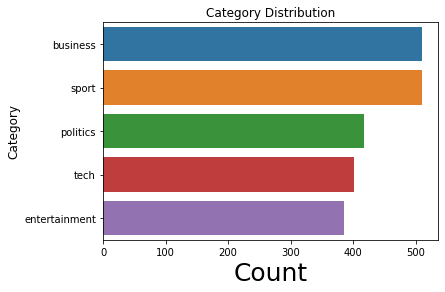

In [11]:
sns.barplot( cat_count.values, cat_count.index,alpha= 1)
plt.title('Category Distribution')
plt.ylabel('Category', fontsize=12)
plt.xlabel('Count', fontsize=25)
plt.show()

# Choosing Performance matrix
The data is approximately evenly distributed among the five classes hence we will choose <b>accuracy</b> as performance matrix.

# Examples of the article.

<h3>1. Business </h3>

In [12]:
print("Category - ", "Business")
print("Article - \n", df[df['category'] == 'business']['article'][401])

Category -  Business
Article - 
 Ethiopia's crop production up 24%

Ethiopia produced 14.27 million tonnes of crops in 2004, 24% higher than in 2003 and 21% more than the average of the past five years, a report says.

In 2003, crop production totalled 11.49 million tonnes, the joint report from the Food and Agriculture Organisation and the World Food Programme said. Good rains, increased use of fertilizers and improved seeds contributed to the rise in production. Nevertheless, 2.2 million Ethiopians will still need emergency assistance.

The report calculated emergency food requirements for 2005 to be 387,500 tonnes. On top of that, 89,000 tonnes of fortified blended food and vegetable oil for "targeted supplementary food distributions for a survival programme for children under five and pregnant and lactating women" will be needed.

In eastern and southern Ethiopia, a prolonged drought has killed crops and drained wells. Last year, a total of 965,000 tonnes of food assistance was nee

<h3>2. Tech </h3>

In [13]:
print("Category - ", "Tech")
print("Artice - \n", df[df['category'] == 'tech']['article'][0])

Category -  Tech
Artice - 
 Half-Life 2 sweeps Bafta awards

PC first person shooter Half-Life 2 has won six Bafta Awards, including best game and best online game.

The title, developed by Valve, was released last year to universal acclaim - receiving special praise for its immersive plot and physics engine. The game also won Baftas for best action adventure, best PC game, art direction and animation. Burnout 3 won three awards in the categories for racing, technical direction and best PlayStation 2 game. Grant Dean, chairman of the Bafta games awards, said at a ceremony in London on Tuesday: "The last year has been a great year for the interactive entertainment industry.

"These awards reflect the enormous achievements, progress and diversity that we have seen in that time." Halo 2 won the best Xbox game category, while Prince of Persia: Warrior Within was adjudged the best GameCube title. The sports award went to Konami's Pro Evolution Soccer 4. Bafta said the "significant feature" 

<h3>3. Entertainment </h3>

In [14]:
print("Category - ", "Entertainment")
print("Artice - \n", df[df['category'] == 'entertainment']['article'][1838])

Category -  Entertainment
Artice - 
 No jail for singer Courtney Love

Singer Courtney Love has been spared jail for assault and drug offences, but must serve three years probation.

She had back-to-back court appearances in two separate cases in Los Angeles, first pleading no contest to attacking a woman with a whisky bottle. In the second, Ms Love, 40, pleaded guilty to possessing a forged prescription and painkiller oxycodone. She must also do 100 hours community service, have drug treatment, attend Narcotics Anonymous and pay a fine. The ex-Hole singer's lawyer Howard Weitzman said Ms Love had "turned her life around" and she was "clean and sober".

The assault charge stemmed from April 2004, when Ms Love found musician Kristin King in her boyfriend's home. Ms King said the singer "threw the bottle at the left side of my face" in an "angry, vicious and erratic" attack. Ms Love was originally charged with the more serious offence of assault with a deadly weapon, but that was reduced

<h3>4. Sports </h3>

In [15]:
print("Category - ", "Sports")
print("Artice - \n", df[df['category'] == 'sport']['article'][911])

Category -  Sports
Artice - 
 Solskjaer raises hopes of return

Manchester United striker Ole Gunnar Solskjaer said he hoped to return next season following a career-threatening injury to his right knee.

The 31-year-old Norway international had surgery in Sweden in August to transplant cartilage into the joint. "I'm in no doubt that I'll play again," Solskjaer told Aftenposten Daily. "The problem will be the speed but we're talking about eight months' time. It's going as it should with the knee. I'm slavishly following a programme." Solskjaer last played for United as a late substitute in May's FA Cup final win over Millwall. His contract with United runs out in 2006, by which time he will have been at the Premier League club for 10 years.



<h3>5. Politics </h3>

In [16]:
print("Category - ", "Poilitics")
print("Artice - \n", df[df['category'] == 'politics']['article'][1421])

Category -  Poilitics
Artice - 
 Butler launches attack on Blair

Former civil service chief Lord Butler has criticised the way Tony Blair's government operates, accusing it of being obsessed with headlines.

He also attacked the way the Iraq war was "sold" to the public, with important warnings on the strength of the intelligence left out. Tory leader Michael Howard said Lord Butler had given the "most damaging testimony" he could remember. But Downing Street said Mr Blair should be judged by results not his style.

Lord Butler said Mr Blair bypassed the Cabinet and relied instead on small, informal groups of advisers to help him make decisions. The prime minister's official spokesman said the Cabinet was still used to achieve a consensus on important issues. But he added: "You cannot, in a modern government, take every decision in Cabinet. It's just not possible."

Lord Butler said the government had too much freedom to "bring in bad Bills" and "to do whatever it likes" and it relied

# Mapping the category (Y)
business  - 1 <br>
entertainment  - 2 <br>
politics  - 3 <br>
sport  - 4 <br>
tech  - 5 <br>

In [17]:
df['num_cat'] = df['category'].map({'business': 1, 'entertainment': 2, 'politics':3, 'sport': 4, 'tech':5})

In [18]:
df.head()

,article,category,num_cat
0,Half-Life 2 sweeps Bafta awards\n\nPC first pe...,tech,5
1,UK pioneers digital film network\n\nThe world'...,tech,5
2,Google's toolbar sparks concern\n\nSearch engi...,tech,5
3,China net cafe culture crackdown\n\nChinese au...,tech,5
4,'Ultimate game' award for Doom 3\n\nSci-fi sho...,tech,5


In [19]:
Y = df['num_cat'] 

# How ML models will work on text data?

<img src="images/flowchart.PNG">

After getting the text data, first process is to clean the text data. <br> 
<b> Essential text preprocessing </b> envolves <br> <b>1. Lowering the text </b> so that <b>Profit and profit</b> are not understood differently by the ML model.<br>
<b>2. Removing unwanted character </b>  this involves removing punctuation marks, numbers in text etc. <br>
<b>3. Lemmatisation </b> is a process to convert every word to it's root word. <b>eaten</b> and <b>eating</b> has same root 
    <b>eat</b> so every word is converted to root word.<br>
<b>4. Removing stop words</b> The  words like <b>the, a, and etc. </b> are believed that they donot have any predictive power, hence they are removed. <br><br>

After applying Essential text preprocessing, now it's time to convert words to vectors and that is done using<br>
<b>1. Bag of words</b> <br>
<b>2. Tf- iDF</b> <br>
and we can apply ML models on each Vectorization method, furthur we will see how they work and apply ML models on each of them.

<li>Downloading nltk package "stopwords" to remove stopword and "wordnet" for lemmatisation. </li>

In [20]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Essential Text Preprocessing
1. Lowering the text.
2. Lemmetization
2. Removing unnecessary words.
3. Removing stop words

In [21]:
lemmatizer = WordNetLemmatizer()
def essential_preprocess(article):
    corpus = []
    for i in range(0, len(article)):
        review = re.sub('[^a-zA-Z]', ' ', article[i]) ## keeping only character
        review = review.lower() #lowering the words
        review = review.split() # converting sentences to words
        review = [lemmatizer.lemmatize(word)  for word in review if not word in stopwords.words('english')] # Lemmatizing or finding root word
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [22]:
corpus =  essential_preprocess(df['article'])

len_article = []
for i in range(len(corpus)):
    len_article.append(len(corpus[i]))
    
clean_text_df = pd.DataFrame(list(zip(corpus, y,len_article)), 
               columns =['article', 'category','len_article']) 
clean_text_df.head()

,article,category,len_article
0,half life sweep bafta award pc first person sh...,tech,1007
1,uk pioneer digital film network world first di...,tech,2009
2,google toolbar spark concern search engine fir...,tech,1999
3,china net cafe culture crackdown chinese autho...,tech,1445
4,ultimate game award doom sci fi shooter doom b...,tech,1171


(array([1.580e+02, 1.041e+03, 6.430e+02, 2.570e+02, 8.900e+01, 1.900e+01,
        7.000e+00, 1.000e+00, 2.000e+00, 0.000e+00]),
 array([   0.,  700., 1400., 2100., 2800., 3500., 4200., 4900., 5600.,
        6300., 7000.]),
 <a list of 10 Patch objects>)

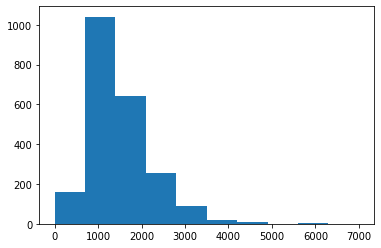

In [23]:
plt.hist(clean_text_df['len_article'], range = [0,7000])

# Creating word clouds

In [24]:
def visualize(label):
    words = ''
    for msg in clean_text_df[clean_text_df['category'] == label]['article']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

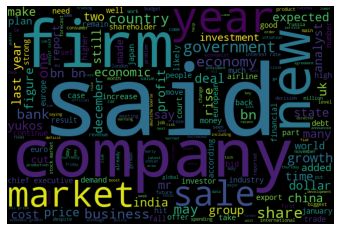

In [25]:
visualize('business')

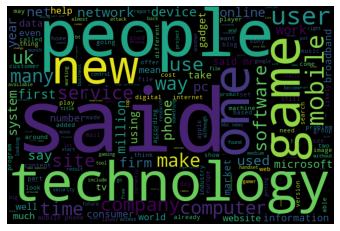

In [26]:
visualize('tech')

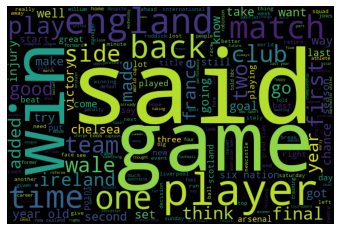

In [27]:
visualize('sport')

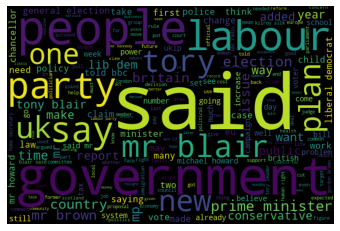

In [28]:
visualize('politics')

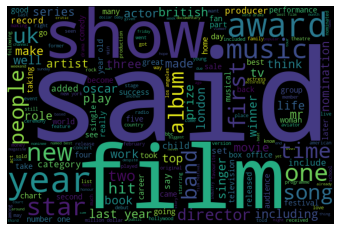

In [29]:
visualize('entertainment')

# Machine Learning Modeling Technique
<b><li> Naive Bayes </li></b>
<i>"Naive Bayes classifiers since they are known to perform well in document classification. Naive Bayes classifiers use Bayes’ Theorem to calculate the probability of a article belonging to a class given its features, assuming that every pair of features are conditionally independent (this is the naive part). The classifier also assumes that the position of the word doesn’t matter (Bag of Words assumption). The classifier then makes a prediction by maximizing the log-likelihood of the probability with respect to the parameters, using Maximum A Posteriori (MAP), choosing the class with the highest probability that the article might belong to."</i><br>

\begin{equation*}
P(A|B) =  \frac{P(B|A).P(A)}{P(B)}
\end{equation*}

<b><li> Logistic Regression </li></b>
<i>"Logistic regression models the probability of a article being in a certain class. It is a linear method that makes predictions using softmax function and assigns class membership by maximizing the probability of a class given the article’ features using Maximum Likelihood Estimate.<br>

Compared to Naive Bayes classifier, logistic regression is much more robust to correlated features. If two features X1 and X2 are perfectly correlated, regression assigns part of the weight to W1 and part to W2. When there are many correlated features, or in this case words, logistic regression will assign a more accurate probability than Naive Bayes classifiers. It is generally claimed that logistic regression works better on larger documents."</i><br>

\begin{equation*}
log( \frac{Y}{1-Y}) = b_0 + b_1X_1 + b_2+X_2+...+b_nX_n
\end{equation*}


# Preprocessing Technique for ML models
<b><li> Bag of words </li> </b>
We need a way to represent text data for machine learning algorithm and the bag-of-words model helps us to achieve that task. The bag-of-words model is simple to understand and implement. It is a way of extracting features from the text for use in machine learning algorithms.<br>

<img src="images/countvec.png">


In [30]:
corpus = essential_preprocess(df['article'])

In [31]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [32]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,  random_state=42)

In [33]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("train score:", nb.score(X_train, y_train))
print("test score:", nb.score(X_test,y_test))
ts_acc_nb_bow   = nb.score(X_test,y_test)
tr_acc_nb_bow  = nb.score(X_train, y_train)

train score: 0.9932546374367622
test score: 0.9775280898876404


In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("train score:", lr.score(X_train, y_train))
print("test score:", lr.score(X_test,y_test))
ts_acc_lr_bow = lr.score(X_test,y_test)
tr_acc_lr_bow = lr.score(X_train, y_train)

train score: 1.0
test score: 0.9752808988764045


<b> <li> Tf-iDF </li> </b>
TF-IDF stands for term frequency-inverse document frequency. TF-IDF weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.
[Read More](http://www.tfidf.com/)



In [35]:
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [36]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,  random_state=42)

In [37]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("train score:", nb.score(X_train, y_train))
print("test score:", nb.score(X_test,y_test))
ts_acc_nb_tf  = nb.score(X_test,y_test)
tr_acc_nb_tf  =  nb.score(X_train, y_train)

train score: 0.9876335019673974
test score: 0.9797752808988764


In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("train score:", lr.score(X_train, y_train))
print("test score:", lr.score(X_test,y_test))
ts_acc_lr_tf = lr.score(X_test,y_test)
tr_acc_lr_tf = lr.score(X_train, y_train)

train score: 0.9966273187183811
test score: 0.9820224719101124


# Problem with Bag of words and TF-iDF
<li>We are discarding sequence information, which means we are discarding relationship between words and also discarding the context. </li> 
<li>For the small sentences the above method is completely OK however when sentence become big and complex the basic text preprocessing doesnot work well, these methods only calculates whether the particular word is present in the sentence or not.</li>
<li>Bag of words gives us no semantic information, TF-iDF gives us little semantic information. </li>
<li>Bag of words creates sparse matrix which means matrix has more 0's and less 1's. </li>
<li>Both BOW and TF-iDF is unable to understand similarity between the words. </li>

# Word Embedding
<li> To overcome all the problem with BOW and TF-iDF we use Word Embedding. </li>
<li> Word embedding is a technique to represent word to vector. </li>
<li> Rather than 1's and lot 0's every word is presented by the vector. </li>
<li> Words which are similar or related are represented closely, and the words which are not similar the distance between there vector is large. </li>
<li>Similarity between words is calculated by <b>cosine similarity</b> between vectors.</li>

<h3>cosine similarity formula</h3> <br>

\begin{equation*}
similarity = cos(\theta) = \frac{A.B}{||A|| ||B||} =  \frac{\sum_{i=1}^{n} A_i b_i} {\sqrt[]{\sum_{i=1}^{n} A^2_i} \sqrt[]{\sum_{i=1}^{n} B^2_i}} 
\end{equation*}

<h3>CBOW vs Skip gram model</h3> <br>

<img src="images/Wordembedding.PNG">

<br>
<li> In continues CBOW (continues bag of word) model <b>surrounding words are given to predict the word in the middle.</b> </li> 
<li> In Skip-gram model, <b> word is given to predict the context.</b> </li>

[Read More](https://arxiv.org/pdf/1301.3781.pdf)

<h3> Word embedding output</h3><br>
<img src="images/1.Wordembedding.PNG">

In this project we will use keras Embedding layer.

# Deep Learning Modeling Technique
<li> RNN (Recurrent neural network) </li>
<li> LSTM (Long short-term memory) </li>
<li> GRU (Gated recurrent unit) </li>
<li>Bidirectional RNN</li>
<li>Bidirectional LSTM </li>
<li>Bidirectional GRU</li>

# RNN 
<li>In feedforward neural network activation flows only forward. </li>
<li>RNN is similar to the Feedforward neural network except connection is pointing backward. </li> <br>

<img src="images/rnn.PNG">

<br>

<li>Diagram shows idea of RNN, at each time stamp <b>t</b> it receives input X$_t$ and also output from the previous time stamp h$_{t-1}$  as input and it produces output Y$_t$.</li> 
<li>At given state <b>t</b> the output  Y$_{t}$ is given </li> <h3>Y$_{(t)}$ = $\phi$($X^T_{(t)}$$\cdot$$W_x$ + $Y^T_{(t-1)}$$\cdot$$W_y$+b ) </h3>

where,<br>
$Y_{(t)}$ $\rightarrow$ output at time step t <br>
$\phi$ $\rightarrow$ activation function <br>
$X_{(t)}$ $\rightarrow$ input matrix of a single instance<br>
$W_{(x)}$ $\rightarrow$  connection weights for the inputs of the current time step<br>
$Y_{(t-1)}$ $\rightarrow$ output previous time step <br>
$W_{(y}$ $\rightarrow$ connection weights for the outputs of the previous
time step.
 <br>
$b$ $\rightarrow$  bias

<h3>Problem with RNN</h3>
RNNs suffer from the problem of vanishing gradients, which hampers learning of long data sequences. The gradients carry information used in the RNN parameter update and when the gradient becomes smaller and smaller, the parameter updates become insignificant which means no real learning is done.

# LSTM
<li>Long short term memory cell was proposed in 1997.</li>
<li>The advantage over RNN is it will converge faster (gradients will not vanish), it will detect long term dependencies. </li> <br>

<img src="images/lstm.PNG">

<br>

Diagram shows idea of LSTM we can think $h_{(t)}$ as short-term state and $c_{(t)}$ as long-term state.<br>
<li>The key idea is that the network can learn what to store in the long-term state, what to throw away</li>
<li>$c_{(t-1)}$ which has long term memory it first goes through a forget gate, dropping some memories, and then it adds some new memories via the addition operation  the memories that were selected by an input gate, so in resultant $c_{(t)}$ each time some memories are dropped and new memories are added </li>
<li> After addition operation the long term state is copied and passed through the tanh function and result is filtered by the outpuut gate, it creates output for current time step $y_{(t)}$ and also short term state $h_{(t)}$. </li>
<li>$g_{(t)}$ analyse current input $X_{(t)}$ and previous short time output $h_{(t-1)}$. It's output is used to add new info in $c_{(t-1)}$ to make $c_{(t)}$.</li>
<li>Forget gate is controlled by $f_{(t)}$ which controls which info to forget.</li>
<li>Input gate $i_{(t)}$ controls which part of $g_{(t)}$ should be added to long term memory.</li>
<li>Output gate $o_{(t)}$ controls which parts e long-term state should be
read and output at this time step. </li>
<h3>$i_{(t)}$ = $\sigma$($W^T_{xi}$$\cdot$$X_{(t)}$ + $W^T_{(i}$$\cdot$$h_{(i-1)}$+$b_{i}$)</h3> 
<h3>$f_{(t)}$ = $\sigma$($W^T_{xf}$$\cdot$$X_{(t)}$ + $W^T_{hf}$$\cdot$$h_{(i-1)}$+$b_{f}$)</h3>
<h3>$o_{(t)}$ = $\sigma$($W^T_{xo}$$\cdot$$X_{(t)}$ + $W^T_{ho}$$\cdot$$h_{(i-1)}$+$b_{o}$)</h3>
<h3>$g_{(t)}$ = $\tanh$($W^T_{xg}$$\cdot$$X_{(t)}$ + $W^T_{hg}$$\cdot$$h_{(i-1)}$+$b_{g}$)</h3>
<h3>$c_{(t)}$ = $f_{(t)}$ $\bigotimes$ $c_{(t-1)}$ + $i_{(t)}$ $\bigotimes$ $g_{(t)}$  </h3>
<h3>$y_{(t)}$  = $h_{(t)}$ = $o_{(t)}$ $\bigotimes$ $\tanh$($c_{(t)}$ )   </h3>

$W_{xi}$, $W_{xf}$, $W_{xo}$, $W_{xg}$   $\rightarrow$ weight matrices of each of their connection to the input vector $X_{(t)}$ <br>

$W_{hi}$, $W_{hf}$, $W_{ho}$, $W_{hg}$   $\rightarrow$ are the weight matrices of each of the four layers for their connection to the previous short-term state $h_{(t-1)}$ <br>

$b_{i}$, $b_{f}$, $b_{o}$, $b_{g}$   $\rightarrow$ are the bias terms for each of the four layers.


# GRU
<li>Gated Recurrent Unit was proposed in year 2014.</li>
<li>GRU is simplied version of LSTM.</li>
<li>Long term and Short term state vectors are merged into single vector.</li>
<li>Single gate controller contols both forget gate and input gate.</li>
<li>There is no output gate; the full state vector is output at every time step</li>

<br>
<img src="images/gru.PNG">
<br>


<h3>$z_{(t)}$ = $\sigma$($W^T_{xz}$$\cdot$$X_{(t)}$ + $W^T_{hz}$$\cdot$$h_{(t-1)}$</h3>
<h3>$r_{(t)}$ = $\sigma$($W^T_{xr}$$\cdot$$X_{(t)}$ + $W^T_{hr}$$\cdot$$h_{(t-1)}$</h3>
<h3>$g_{(t)}$ = $\tanh$($W^T_{xg}$$\cdot$$X_{(t)}$ + $W^T_{hg}$$\cdot$($r_{(t)}$ $\bigotimes$ $h_{(i-1)}$))</h3>
<h3>$h_{(t)}$ = (1-$z_{(t)}$) $\bigotimes$ $h_{(t-1)}$ + $z_{(t)}$ $\bigotimes$ $g_{(t)}$ </h3>

# How DL model will work on Text data? (Putting it all together)
<img src="images/dlflowchart.PNG">
After getting the text data, first process is to clean the text data. <br> 
<b> Essential text preprocessing </b> envolves <br> <b>1. Lowering the text </b> so that <b>Profit and profit</b> are not understood differently by the ML model.<br>
<b>2. Removing unwanted character </b>  this involves removing punctuation marks, numbers in text etc. <br>
<b>3. Lemmatisation </b> is a process to convert every word to it's root word. <b>eaten</b> and <b>eating</b> has same root 
    <b>eat</b> so every word is converted to root word.<br>
<b>4. Removing stop words</b> The  words like <b>the, a, and etc. </b> are believed that they donot have any predictive power, hence they are removed. <br><br>

<li>After doing essential preprocessing we convert text to numbers, every word is assigned unique number. </li>

<li>Padding is done (seq of zeros are added), to make sentence equal length </li>
<li>We are using keras pretrained Embedding layer to create word embedding </li>
<li>The embedded output is directly feeded to deep learning models such as RNN, LSTM and GRU</li>


In [39]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,SimpleRNN,GRU, Bidirectional
from tensorflow.keras.layers import Dense

In [40]:
corpus = essential_preprocess(df['article'])

In [41]:
voc_size=5000

In [42]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [43]:
sent_length=2000
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  310 2453 2502]
 [   0    0    0 ... 3047 2906 2970]
 [   0    0    0 ... 4698 2624 2662]
 ...
 [   0    0    0 ...  149  259  937]
 [   0    0    0 ...  242 2901  109]
 [   0    0    0 ... 3218  971 4110]]


In [44]:
embedded_docs[0]

array([   0,    0,    0, ...,  310, 2453, 2502], dtype=int32)

In [45]:
X=np.array(embedded_docs)

In [46]:
Y = pd.get_dummies(df['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2224, 5)


In [47]:
X.shape, Y.shape

((2224, 2000), (2224, 5))

In [48]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,  random_state=42)

# Simple RNN

In [49]:
## Creating model
embedding_vector_features=100
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(SimpleRNN(100))
model1.add(Dense(5,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 100)         500000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               20100     
_________________________________________________________________
dense (Dense)                (None, 5)                 505       
Total params: 520,605
Trainable params: 520,605
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
### Finally Training
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
 2/28 [=>............................] - ETA: 25s - loss: 1.5949 - accuracy: 0.2188WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0014s vs `on_train_batch_end` time: 0.9134s). Check your callbacks.


28/28 [==============================] - ETA: 0s - loss: 1.5940 - accuracy: 0.2558WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0011s vs `on_test_batch_end` time: 0.1137s). Check your callbacks.


28/28 [==============================] - 26s 938ms/step - loss: 1.5940 - accuracy: 0.2558 - val_loss: 1.5753 - val_accuracy: 0.2831
Epoch 2/10
28/28 [==============================] - 28s 986ms/step - loss: 1.0612 - accuracy: 0.8752 - val_loss: 1.5572 - val_accuracy: 0.3169
Epoch 3/10
28/28 [==============================] - 27s 969ms/step - loss: 0.4455 - accuracy: 0.9865 - val_loss: 1.6291 - val_accuracy: 0.3101
Epoch 4/10
28/28 [==============================] - 27s 961ms/step - loss: 0.1309 - accuracy: 1.0000 - val_loss: 1.6946 - val_accuracy: 0.3169
Epoch 5/10
28/28 [==============================] - 27s 959ms/step - loss: 0.0504 - accuracy: 1.0000 - val_loss: 1.7996 - val_accuracy: 0.3079
Epoch 6/10
28/28 [==============================] - 23s 825ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 1.8817 - val_accuracy: 0.2989
Epoch 7/10
28/28 [==============================] - 24s 846ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 1.9413 - val_accuracy: 0.2944
Epoch 8/10

In [51]:
y_ts= np.where(y_test==1)
y_tr= np.where(y_train==1)
y_pred_test = model1.predict_classes(X_test)
y_pred_train = model1.predict_classes(X_train)
print("train score:", accuracy_score(y_tr[1], y_pred_train))
print("test score:", accuracy_score(y_ts[1], y_pred_test))
ts_acc_rnn = accuracy_score(y_ts[1], y_pred_test)
tr_acc_rnn = accuracy_score(y_tr[1], y_pred_train)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


train score: 1.0
test score: 0.3056179775280899


# LSTM

In [52]:
## Creating model
embedding_vector_features=100
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(LSTM(100))
model2.add(Dense(5,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2000, 100)         500000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 580,905
Trainable params: 580,905
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
 2/28 [=>............................] - ETA: 37s - loss: 1.6092 - accuracy: 0.2344WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0007s vs `on_train_batch_end` time: 1.2868s). Check your callbacks.


28/28 [==============================] - ETA: 0s - loss: 1.5751 - accuracy: 0.2917WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0008s vs `on_test_batch_end` time: 0.3314s). Check your callbacks.


28/28 [==============================] - 42s 1s/step - loss: 1.5751 - accuracy: 0.2917 - val_loss: 1.5174 - val_accuracy: 0.3820
Epoch 2/10
28/28 [==============================] - 40s 1s/step - loss: 1.0715 - accuracy: 0.5329 - val_loss: 0.8007 - val_accuracy: 0.7348
Epoch 3/10
28/28 [==============================] - 41s 1s/step - loss: 0.5884 - accuracy: 0.8465 - val_loss: 0.6765 - val_accuracy: 0.8045
Epoch 4/10
28/28 [==============================] - 41s 1s/step - loss: 0.3704 - accuracy: 0.9477 - val_loss: 0.4049 - val_accuracy: 0.8989
Epoch 5/10
28/28 [==============================] - 42s 1s/step - loss: 0.2979 - accuracy: 0.9286 - val_loss: 0.3930 - val_accuracy: 0.8742
Epoch 6/10
28/28 [==============================] - 42s 1s/step - loss: 0.1035 - accuracy: 0.9798 - val_loss: 0.2048 - val_accuracy: 0.9258
Epoch 7/10
28/28 [==============================] - 42s 1s/step - loss: 0.1356 - accuracy: 0.9668 - val_loss: 0.3715 - val_accuracy: 0.8831
Epoch 8/10
28/28 [=============

In [54]:
y_ts= np.where(y_test==1)
y_tr= np.where(y_train==1)
y_pred_test = model2.predict_classes(X_test)
y_pred_train = model2.predict_classes(X_train)
print("train score:", accuracy_score(y_tr[1], y_pred_train))
print("test score:", accuracy_score(y_ts[1], y_pred_test))
ts_acc_lstm = accuracy_score(y_ts[1], y_pred_test)
tr_acc_lstm = accuracy_score(y_tr[1], y_pred_train)

train score: 1.0
test score: 0.9101123595505618


# GRU

In [55]:
## Creating model
embedding_vector_features=100
model3=Sequential()
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model3.add(GRU(100))
model3.add(Dense(5,activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2000, 100)         500000    
_________________________________________________________________
gru (GRU)                    (None, 100)               60600     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 561,105
Trainable params: 561,105
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
 2/28 [=>............................] - ETA: 38s - loss: 1.6098 - accuracy: 0.2188WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_train_batch_end` time: 1.3464s). Check your callbacks.


28/28 [==============================] - ETA: 0s - loss: 1.5935 - accuracy: 0.2850WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_test_batch_end` time: 0.2613s). Check your callbacks.


28/28 [==============================] - 40s 1s/step - loss: 1.5935 - accuracy: 0.2850 - val_loss: 1.5749 - val_accuracy: 0.3371
Epoch 2/10
28/28 [==============================] - 36s 1s/step - loss: 1.3820 - accuracy: 0.4435 - val_loss: 1.3385 - val_accuracy: 0.4382
Epoch 3/10
28/28 [==============================] - 38s 1s/step - loss: 0.8831 - accuracy: 0.7167 - val_loss: 0.9251 - val_accuracy: 0.6180
Epoch 4/10
28/28 [==============================] - 38s 1s/step - loss: 0.4620 - accuracy: 0.9056 - val_loss: 0.8064 - val_accuracy: 0.6831
Epoch 5/10
28/28 [==============================] - 39s 1s/step - loss: 0.1723 - accuracy: 0.9792 - val_loss: 0.7246 - val_accuracy: 0.7371
Epoch 6/10
28/28 [==============================] - 37s 1s/step - loss: 0.0529 - accuracy: 0.9972 - val_loss: 0.6980 - val_accuracy: 0.7640
Epoch 7/10
28/28 [==============================] - 36s 1s/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.7228 - val_accuracy: 0.7730
Epoch 8/10
28/28 [=============

In [57]:
y_ts= np.where(y_test==1)
y_tr= np.where(y_train==1)
y_pred_test = model3.predict_classes(X_test)
y_pred_train = model3.predict_classes(X_train)
print("train score:", accuracy_score(y_tr[1], y_pred_train))
print("test score:", accuracy_score(y_ts[1], y_pred_test))
ts_acc_gru = accuracy_score(y_ts[1], y_pred_test)
tr_acc_gru = accuracy_score(y_tr[1], y_pred_train)

train score: 1.0
test score: 0.7842696629213484


# Bidirectional RNN

In [58]:
## Creating model
embedding_vector_features=100
model4=Sequential()
model4.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model4.add(Bidirectional(SimpleRNN(100)))
model4.add(Dense(5,activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 2000, 100)         500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1005      
Total params: 541,205
Trainable params: 541,205
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
model4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
 2/28 [=>............................] - ETA: 30s - loss: 1.6026 - accuracy: 0.2812WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0023s vs `on_train_batch_end` time: 1.0428s). Check your callbacks.


28/28 [==============================] - ETA: 0s - loss: 1.6083 - accuracy: 0.2333WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0008s vs `on_test_batch_end` time: 0.1239s). Check your callbacks.


28/28 [==============================] - 31s 1s/step - loss: 1.6083 - accuracy: 0.2333 - val_loss: 1.6016 - val_accuracy: 0.2809
Epoch 2/10
28/28 [==============================] - 29s 1s/step - loss: 1.4126 - accuracy: 0.5239 - val_loss: 1.7091 - val_accuracy: 0.1933
Epoch 3/10
28/28 [==============================] - 30s 1s/step - loss: 1.4571 - accuracy: 0.3828 - val_loss: 1.6746 - val_accuracy: 0.2022
Epoch 4/10
28/28 [==============================] - 29s 1s/step - loss: 1.5349 - accuracy: 0.3367 - val_loss: 1.6034 - val_accuracy: 0.2494
Epoch 5/10
28/28 [==============================] - 30s 1s/step - loss: 1.5426 - accuracy: 0.3069 - val_loss: 1.6029 - val_accuracy: 0.2809
Epoch 6/10
28/28 [==============================] - 30s 1s/step - loss: 1.5262 - accuracy: 0.3440 - val_loss: 1.5858 - val_accuracy: 0.2719
Epoch 7/10
28/28 [==============================] - 30s 1s/step - loss: 1.5168 - accuracy: 0.3744 - val_loss: 1.5982 - val_accuracy: 0.2809
Epoch 8/10
28/28 [=============

In [60]:
y_ts= np.where(y_test==1)
y_tr= np.where(y_train==1)
y_pred_test = model4.predict_classes(X_test)
y_pred_train = model4.predict_classes(X_train)
print("train score:", accuracy_score(y_tr[1], y_pred_train))
print("test score:", accuracy_score(y_ts[1], y_pred_test))
ts_acc_bi_rnn = accuracy_score(y_ts[1], y_pred_test)
tr_acc_bi_rnn = accuracy_score(y_tr[1], y_pred_train)

train score: 0.5036537380550872
test score: 0.2786516853932584


# Bidirectional LSTM

In [61]:
## Creating model
embedding_vector_features=100
model5=Sequential()
model5.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model5.add(Bidirectional(LSTM(100)))
model5.add(Dense(5,activation='softmax'))
model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 2000, 100)         500000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1005      
Total params: 661,805
Trainable params: 661,805
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
model5.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
 2/28 [=>............................] - ETA: 47s - loss: 1.6070 - accuracy: 0.2422WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0011s vs `on_train_batch_end` time: 1.5790s). Check your callbacks.


28/28 [==============================] - ETA: 0s - loss: 1.5907 - accuracy: 0.2906WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_test_batch_end` time: 0.3904s). Check your callbacks.


28/28 [==============================] - 48s 2s/step - loss: 1.5907 - accuracy: 0.2906 - val_loss: 1.4934 - val_accuracy: 0.3618
Epoch 2/10
28/28 [==============================] - 47s 2s/step - loss: 1.2756 - accuracy: 0.4609 - val_loss: 1.0938 - val_accuracy: 0.4315
Epoch 3/10
28/28 [==============================] - 48s 2s/step - loss: 0.9059 - accuracy: 0.6138 - val_loss: 0.9038 - val_accuracy: 0.7011
Epoch 4/10
28/28 [==============================] - 50s 2s/step - loss: 0.6541 - accuracy: 0.7690 - val_loss: 0.6031 - val_accuracy: 0.8225
Epoch 5/10
28/28 [==============================] - 49s 2s/step - loss: 0.3254 - accuracy: 0.9432 - val_loss: 0.3794 - val_accuracy: 0.8876
Epoch 6/10
28/28 [==============================] - 49s 2s/step - loss: 0.1801 - accuracy: 0.9590 - val_loss: 0.3415 - val_accuracy: 0.9079
Epoch 7/10
28/28 [==============================] - 49s 2s/step - loss: 0.0982 - accuracy: 0.9848 - val_loss: 0.3117 - val_accuracy: 0.9034
Epoch 8/10
28/28 [=============

In [63]:
y_ts= np.where(y_test==1)
y_tr= np.where(y_train==1)
y_pred_test = model5.predict_classes(X_test)
y_pred_train = model5.predict_classes(X_train)
print("train score:", accuracy_score(y_tr[1], y_pred_train))
print("test score:", accuracy_score(y_ts[1], y_pred_test))
ts_acc_bi_lstm = accuracy_score(y_ts[1], y_pred_test)
tr_acc_bi_lstm = accuracy_score(y_tr[1], y_pred_train)

train score: 0.9921304103428893
test score: 0.8651685393258427


# Bidirectional GRU

In [64]:
## Creating model
embedding_vector_features=100
model6=Sequential()
model6.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model6.add(Bidirectional(GRU(100)))
model6.add(Dense(5,activation='softmax'))
model6.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model6.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 2000, 100)         500000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               121200    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 1005      
Total params: 622,205
Trainable params: 622,205
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
model6.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
 2/28 [=>............................] - ETA: 43s - loss: 1.6091 - accuracy: 0.2266WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_train_batch_end` time: 1.3809s). Check your callbacks.


28/28 [==============================] - ETA: 0s - loss: 1.5967 - accuracy: 0.2232WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0007s vs `on_test_batch_end` time: 0.2621s). Check your callbacks.


28/28 [==============================] - 43s 2s/step - loss: 1.5967 - accuracy: 0.2232 - val_loss: 1.5923 - val_accuracy: 0.2225
Epoch 2/10
28/28 [==============================] - 43s 2s/step - loss: 1.4013 - accuracy: 0.5211 - val_loss: 1.1977 - val_accuracy: 0.4989
Epoch 3/10
28/28 [==============================] - 45s 2s/step - loss: 0.7046 - accuracy: 0.8016 - val_loss: 0.6470 - val_accuracy: 0.7820
Epoch 4/10
28/28 [==============================] - 44s 2s/step - loss: 0.2477 - accuracy: 0.9584 - val_loss: 0.5744 - val_accuracy: 0.7910
Epoch 5/10
28/28 [==============================] - 44s 2s/step - loss: 0.1104 - accuracy: 0.9848 - val_loss: 0.4341 - val_accuracy: 0.8472
Epoch 6/10
28/28 [==============================] - 45s 2s/step - loss: 0.0357 - accuracy: 0.9938 - val_loss: 0.3920 - val_accuracy: 0.8764
Epoch 7/10
28/28 [==============================] - 45s 2s/step - loss: 0.0143 - accuracy: 0.9983 - val_loss: 0.4689 - val_accuracy: 0.8562
Epoch 8/10
28/28 [=============

In [66]:
y_ts= np.where(y_test==1)
y_tr= np.where(y_train==1)
y_pred_test = model6.predict_classes(X_test)
y_pred_train = model6.predict_classes(X_train)
print("train score:", accuracy_score(y_tr[1], y_pred_train))
print("test score:", accuracy_score(y_ts[1], y_pred_test))
ts_acc_bi_gru = accuracy_score(y_ts[1], y_pred_test)
tr_acc_bi_gru = accuracy_score(y_tr[1], y_pred_train)

train score: 1.0
test score: 0.9168539325842696


# Comparing Models

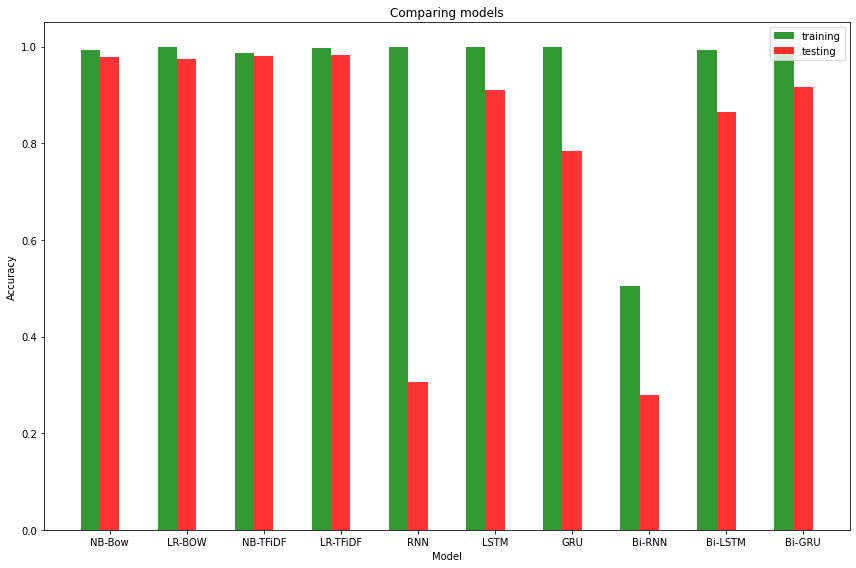

In [67]:
# data to plot
n_groups = 10

testing  = (ts_acc_nb_bow,ts_acc_lr_bow, ts_acc_nb_tf, ts_acc_lr_tf, ts_acc_rnn,ts_acc_lstm,ts_acc_gru,
           ts_acc_bi_rnn,ts_acc_bi_lstm,ts_acc_bi_gru) 

training = (tr_acc_nb_bow,tr_acc_lr_bow, tr_acc_nb_tf, tr_acc_lr_tf, tr_acc_rnn,tr_acc_lstm,tr_acc_gru,
           tr_acc_bi_rnn,tr_acc_bi_lstm,tr_acc_bi_gru) 
# create plot
#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
fig = plt.subplots(figsize =(12, 8)) 

rects1 = plt.bar(index, training, bar_width,
alpha=opacity,
color='g',
label='training')

rects2 = plt.bar(index + bar_width, testing, bar_width,
alpha=opacity,
color='r',
label='testing')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparing models')
plt.xticks(index + bar_width, ('NB-Bow', 'LR-BOW', 'NB-TFiDF', 'LR-TFiDF', 'RNN','LSTM','GRU','Bi-RNN','Bi-LSTM','Bi-GRU'))
plt.legend()

plt.tight_layout()
plt.show()

# Conclusion
<li>Simple RNN and Bidirectional RNN suffers overfitting. </li>
<li>LSTM and Bidirectional LSTM has perfect training accuracy i.e. 1 and has 0.91 and 0.86 testing accuracy respectively. </li>
<li>GRU and Bidirectional GRU also has perfect training accuracy i.e. 1 and has 0.78 and 0.91 testing accuracy respectively. </li>
<li>Machine learning models are best performing, clearly Naive Bayes and Logistic regression out perfomed Deep learning models. </li>
<li>With Bag of words, Naive bayes and Logistic regression both has perfect training score i.e. 1 and both models has same testing score of 0.97. </li>
<li>With TF-iDF, Naive bayes and Logistic regression  has 0.98 and 0.99 training score respectively and has 0.99 and 0.98 testing score respectively. </li>

# Why Machine learning models are performing better.
One of the reason our ML models are performing better is: <br>
Let's see word cloud for all five category<br>
<li> Our articles have the word which we expect to predict correct category of an articles, like business category has words such as <b>company and market</b>, tech category articles has words like <b>technology and mobile,</b> entertainment category has words such as <b>film, award and music </b>,sports category has words such as <b>win, match, player</b> and articles related to politics has words like <b>government, labour, party.</b></li>
<li>What is happening given only one of these words we can predict the category of an article.</li>

# Future work
<li>Simple RNN is clearly overfitting, we can try methods like dropouts or regularization to negate the overfitting.</li>
<li>Although we found the models like Naive bayes, Logistic regression which has nearly perfect accuracy score and models such as LSTM and Bidirectional GRU which are nearly 90% percent accurate, we can try Transformers and BERT and check there performance. </li>

# Reference
[1] Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O'Reilly Media.<br>
[2] Arbel, N. (2020, May 16). How LSTM networks solve the problem of vanishing gradients. Retrieved December 01, 2020, from https://medium.com/datadriveninvestor/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577 <br>
[3] Sianipar, A. (2019, July 30). Predicting a Song's Genre Using Natural Language Processing. Retrieved December 02, 2020, from https://medium.com/better-programming/predicting-a-songs-genre-using-natural-language-processing-7b354ed5bd80

# Libraries used

<b>1.Numpy</b><br>
NumPy¶. (n.d.). Retrieved from https://numpy.org/<br>
<b>2.Pandas</b><br>
pandas. (n.d.). Retrieved from https://pandas.pydata.org/<br>
<b>3.Sklearn</b><br>
learn. (n.d.). Retrieved from https://scikit-learn.org/stable/<br>
<b>4.Matplotlib</b><br>
Visualization with Python¶. (n.d.). Retrieved from https://matplotlib.org/<br>
<b>5.NLTK</b><br>
Natural Language Toolkit¶. (n.d.). Retrieved December 02, 2020, from https://www.nltk.org/<br>
<b>6.Tensorflow</b><br>
TensorFlow. (n.d.). Retrieved December 02, 2020, from https://www.tensorflow.org/<br>
<b>7.WordCloud</b> <br>
WordCloud for Python documentation¶. (n.d.). Retrieved December 02, 2020, from http://amueller.github.io/word_cloud/ <br>
<b>8.Regular Expression</b> <br>
Re - Regular expression operations¶. (n.d.). Retrieved December 02, 2020, from https://docs.python.org/3/library/re.html <br>
<b>9.Glob</b><br>
Glob - Unix style pathname pattern expansion¶. (n.d.). Retrieved December 02, 2020, from https://docs.python.org/3/library/glob.html<br>
<b>10.OS</b><br>
Os - Miscellaneous operating system interfaces¶. (n.d.). Retrieved December 02, 2020, from https://docs.python.org/3/library/os.html<br>
<b>11.Seaborn</b><br>
statistical data visualization¶. (n.d.). Retrieved from https://seaborn.pydata.org/